# Building a fraud detection example

## Setting the example up
The dataset used in this example appears on __[Kaggle](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?resource=download)__. The data is in a 69 MB `.zip` file. Download the file manually and unzip it into the source code directory. Note that you must obtain a __[Kaggle subscription](https://www.kaggle.com/subscribe)__ if you don’t already have one to download this dataset. The example assumes that `creditcard.csv` appears in the same directory as the downloadable source.

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
cardData=pd.read_csv("creditcard.csv")

In [3]:
total_transactions = len(cardData)
normal = len(cardData[cardData.Class == 0])
fraudulent = len(cardData[cardData.Class == 1])
fraud_percentage = fraudulent/normal
print(f'Total Number Transactions: {total_transactions}')
print(f'Normal Transactions: {normal}')
print(f'Fraudulent Transactions: {fraudulent}')
print(f'Fraudulent Transactions Percent: ' \
      f'{fraud_percentage:.2%}')

Total Number Transactions: 284807
Normal Transactions: 284315
Fraudulent Transactions: 492
Fraudulent Transactions Percent: 0.17%


In [4]:
cardData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
print(f'Minimum Value: {min(cardData.Amount)}')
print(f'Mean Value: ' \
      f'{sum(cardData.Amount)/total_transactions}')
print(f'Maximum Value: {max(cardData.Amount)}')
print(cardData['Amount'])

Minimum Value: 0.0
Mean Value: 88.34961925087359
Maximum Value: 25691.16
0         149.62
1           2.69
2         378.66
3         123.50
4          69.99
           ...  
284802      0.77
284803     24.79
284804     67.88
284805     10.00
284806    217.00
Name: Amount, Length: 284807, dtype: float64


In [6]:
cardData.drop(['Time'], axis=1, inplace=True)
print(cardData.shape)

(284807, 30)


In [7]:
scaler = MinMaxScaler(feature_range=(0,1))
col = cardData.columns
cardData = pd.DataFrame(
    scaler.fit_transform(cardData), 
    columns = col)
print(cardData)

              V1        V2        V3        V4        V5        V6        V7  \
0       0.935192  0.766490  0.881365  0.313023  0.763439  0.267669  0.266815   
1       0.978542  0.770067  0.840298  0.271796  0.766120  0.262192  0.264875   
2       0.935217  0.753118  0.868141  0.268766  0.762329  0.281122  0.270177   
3       0.941878  0.765304  0.868484  0.213661  0.765647  0.275559  0.266803   
4       0.938617  0.776520  0.864251  0.269796  0.762975  0.263984  0.268968   
...          ...       ...       ...       ...       ...       ...       ...   
284802  0.756448  0.873531  0.666991  0.160317  0.729603  0.236810  0.235393   
284803  0.945845  0.766677  0.872678  0.219189  0.771561  0.273661  0.265504   
284804  0.990905  0.764080  0.781102  0.227202  0.783425  0.293496  0.263547   
284805  0.954209  0.772856  0.849587  0.282508  0.763172  0.269291  0.261175   
284806  0.949232  0.765256  0.849601  0.229488  0.765632  0.256488  0.274963   

              V8        V9       V10  .

In [8]:
cardData.drop_duplicates(inplace=True)
print(cardData.shape)

(275663, 30)


In [9]:
print(f'Minimum Value: {min(cardData.Amount)}')
print(f'Mean Value: ' \
      f'{sum(cardData.Amount)/total_transactions}')
print(f'Maximum Value: {max(cardData.Amount)}')
print(cardData['Amount'])

Minimum Value: 0.0
Mean Value: 0.00341246851336739
Maximum Value: 1.0
0         0.005824
1         0.000105
2         0.014739
3         0.004807
4         0.002724
            ...   
284802    0.000030
284803    0.000965
284804    0.002642
284805    0.000389
284806    0.008446
Name: Amount, Length: 275663, dtype: float64


## Splitting the data into train and test sets

In [10]:
from sklearn.model_selection \
    import train_test_split

In [11]:
X = cardData.drop('Class', axis=1).values
y = cardData['Class'].values
print(X)
print(y)

[[9.35192337e-01 7.66490419e-01 8.81364903e-01 ... 4.18976135e-01
  3.12696634e-01 5.82379309e-03]
 [9.78541955e-01 7.70066651e-01 8.40298490e-01 ... 4.16345145e-01
  3.13422663e-01 1.04705276e-04]
 [9.35217023e-01 7.53117667e-01 8.68140819e-01 ... 4.15489266e-01
  3.11911316e-01 1.47389219e-02]
 ...
 [9.90904812e-01 7.64079694e-01 7.81101998e-01 ... 4.16593177e-01
  3.12584864e-01 2.64215395e-03]
 [9.54208999e-01 7.72855742e-01 8.49587129e-01 ... 4.18519535e-01
  3.15245157e-01 3.89238944e-04]
 [9.49231759e-01 7.65256401e-01 8.49601462e-01 ... 4.16466371e-01
  3.13400843e-01 8.44648509e-03]]
[0. 0. 0. ... 0. 0. 0.]


In [12]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, random_state=1)
print(f"X training data size: {X_train.shape}")
print(f"X testing data size: {X_test.shape}")
print(f"y training data size: {y_train.shape}")
print(f"y testing data size: {y_test.shape}")

X training data size: (220530, 29)
X testing data size: (55133, 29)
y training data size: (220530,)
y testing data size: (55133,)


## Building the model

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
dtc = DecisionTreeClassifier(max_depth = 5)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

## Performing the analysis

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

In [16]:
# Remove the deprecated warning message for plot_confusion_matrix().
import warnings
warnings.filterwarnings("ignore")

In [17]:
dtc_yHat = dtc.predict(X_test)
print(f"Accuracy score: " \
      f"{accuracy_score(y_test, dtc_yHat)}")

Accuracy score: 0.9993651714943863


In [18]:
print(confusion_matrix(y_test, 
                       dtc_yHat, 
                       labels=[0, 1]))

[[55025     6]
 [   29    73]]


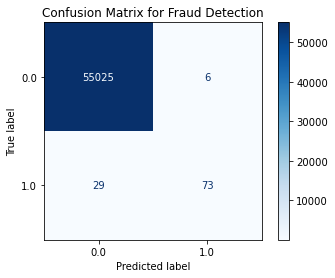

In [19]:
matrix = plot_confusion_matrix(dtc,
                               X=X_test,
                               y_true=y_test,
                               cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Fraud Detection')
plt.show(matrix)
plt.show()

## Checking another model

In [20]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

In [21]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
mnb_yHat = mnb.predict(X_test)
print(f"Accuracy score: " \
      f"{accuracy_score(y_test, mnb_yHat)}")

Accuracy score: 0.9981499283550687


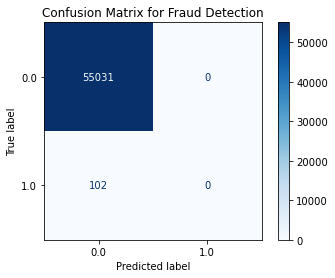

In [22]:
matrix = plot_confusion_matrix(mnb,
                               X=X_test,
                               y_true=y_test,
                               cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Fraud Detection')
plt.show(matrix)
plt.show()

In [23]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
knn_yHat = knn.predict(X_test)
print(f"Accuracy score: ' \
      f'{accuracy_score(y_test, knn_yHat)}")

Accuracy score: '       f'0.99927448170787


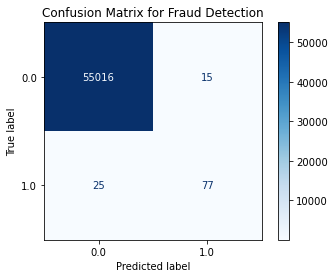

In [24]:
matrix = plot_confusion_matrix(knn,
                               X=X_test,
                               y_true=y_test,
                               cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Fraud Detection')
plt.show(matrix)
plt.show()

## Creating a ROC curve

In [25]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from numpy import argmax
from numpy import sqrt

In [26]:
dtc_y_scores = dtc.predict_proba(X_test)
dtc_fpr, dtc_tpr, dtc_thresholds = \
    roc_curve(y_test, dtc_y_scores[:, 1])
dtc_roc_auc = auc(dtc_fpr, dtc_tpr)

In [27]:
knn_y_scores = knn.predict_proba(X_test)
knn_fpr, knn_tpr, knn_thresholds = \
    roc_curve(y_test, knn_y_scores[:, 1])
knn_roc_auc = auc(knn_fpr, knn_tpr)

In [28]:
dtc_gmeans = sqrt(dtc_tpr * (1-dtc_fpr))
dtc_ix = argmax(dtc_gmeans)
print('Best DTC Threshold=%f, G-Mean=%.3f'
      % (dtc_thresholds[dtc_ix], dtc_gmeans[dtc_ix]))

knn_gmeans = sqrt(knn_tpr * (1-knn_fpr))
knn_ix = argmax(knn_gmeans)
print('Best kNN Threshold=%f, G-Mean=%.3f'
      % (knn_thresholds[knn_ix], knn_gmeans[knn_ix]))

Best DTC Threshold=0.062500, G-Mean=0.885
Best kNN Threshold=0.142857, G-Mean=0.907


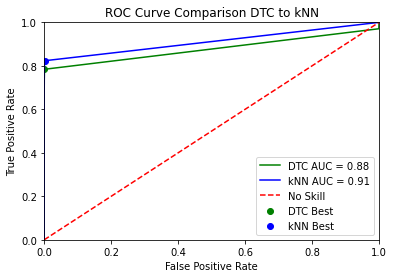

In [29]:
plt.title('Receiver Operating Characteristic')
plt.plot(dtc_fpr, dtc_tpr, 'g', 
         label = 'DTC AUC = %0.2f' % dtc_roc_auc)
plt.plot(knn_fpr, knn_tpr, 'b', 
         label = 'kNN AUC = %0.2f' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--',
         label = 'No Skill')
plt.scatter(dtc_fpr[dtc_ix], dtc_tpr[dtc_ix], 
            marker='o', color='g', 
            label='DTC Best')
plt.scatter(knn_fpr[knn_ix], knn_tpr[knn_ix], 
            marker='o', color='b', 
            label='kNN Best')
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve Comparison DTC to kNN')
plt.show()